In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as  plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

df = pd.read_csv('sales_data.csv')  # or encoding='cp1252'
print(df.head())

    Product Region    Sales  Profit  Discount         Category        Date
0   Printer   East      NaN  536.96      0.21  Office Supplies  2024-12-11
1   Printer   West  1940.18  264.68       NaN  Office Supplies  2021-07-09
2     Mouse  South  2522.18  330.00      0.43  Office Supplies  2023-11-25
3  Keyboard   East      NaN   40.57      0.36      Accessories  2021-10-12
4    Tablet   West  1993.97  225.14      0.17  Office Supplies  2024-08-02


In [43]:
# Show the Shape of the Dataset
print("Shape of the dataset:", df.shape)

# Check Data Types of Each Column
print("\nData types of each column:")
print(df.dtypes)

# Check for Missing Values
print("\nMissing values in each column:")
print(df.isnull().sum())

Shape of the dataset: (1530, 7)

Data types of each column:
Product      object
Region       object
Sales       float64
Profit      float64
Discount    float64
Category     object
Date         object
dtype: object

Missing values in each column:
Product       0
Region        0
Sales       190
Profit      192
Discount    193
Category     40
Date          0
dtype: int64


In [79]:
df.columns = df.columns.str.strip().str.lower()
df = df.drop_duplicates()
print("Duplicates removed. New shape:", df.shape)

# 4. Fill Missing V   l.alues
# For numerical columns: use mean or median
numeric_cols = df.select_dtypes(include=[np.number]).columns

for col in numeric_cols:
    if df[col].isnull().sum() > 0:
        # Use mean for 'Sales', 'Profit'; median for 'Discount' (example)
        if col in ['Sales', 'Profit']:
            df[col] = df[col].fillna(df[col].mean())
        else:
            df[col] = df[col].fillna(df[col].median())
print("Missing numeric values filled.")

#  Convert 'Date' Column to datetime format
df.columns = df.columns.str.strip()  # Clean any extra spaces
df['date'] = pd.to_datetime(df['date'], errors='coerce')
print("✅ 'Date' column converted to datetime.")

Duplicates removed. New shape: (1530, 7)
Missing numeric values filled.
✅ 'Date' column converted to datetime.


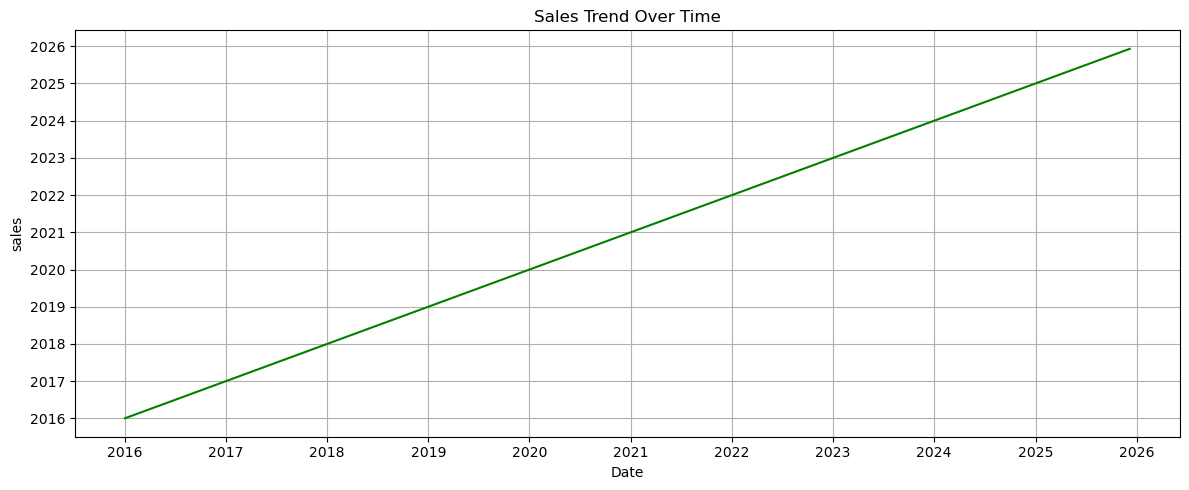

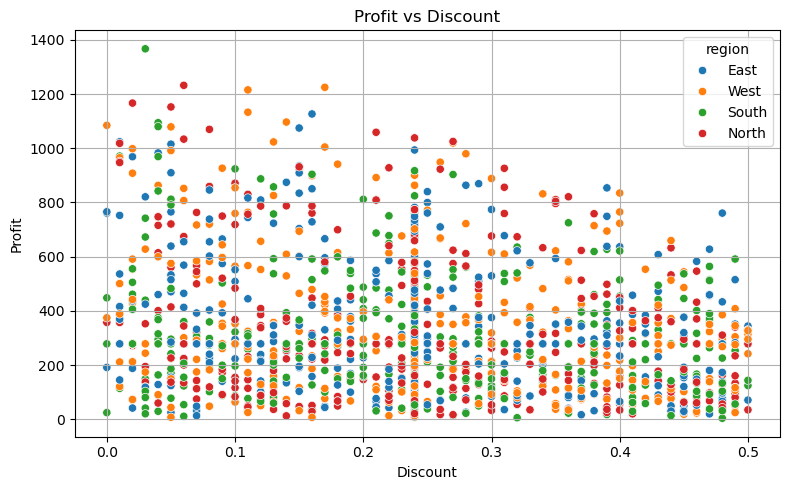

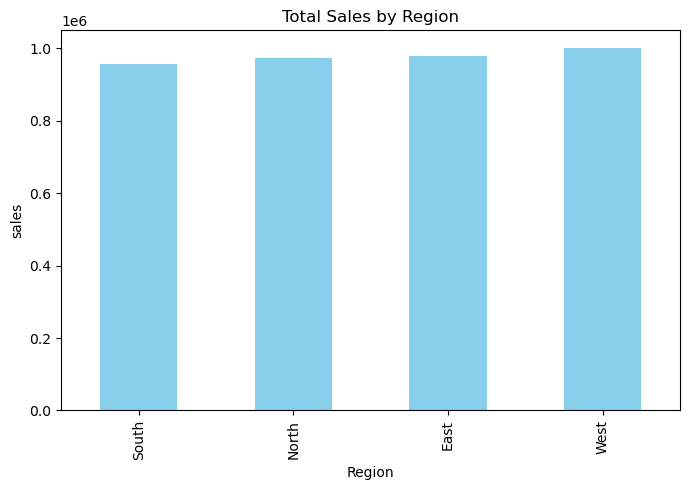

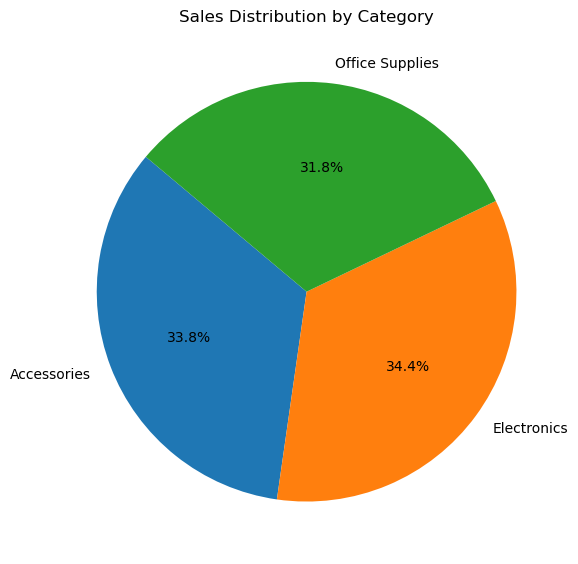

In [81]:
df.columns = df.columns.str.strip().str.lower()

# 📈 1. Time Series Plot: Sales Over Time
plt.figure(figsize=(12, 5))
df_sorted = df.sort_values('date')
plt.plot(df_sorted['date'], df_sorted['date'], color='green')
plt.title("Sales Trend Over Time")
plt.xlabel("Date")
plt.ylabel("sales")
plt.grid(True)
plt.tight_layout()
plt.show()

# ================================
# Scatter Plot: Profit vs Discount
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x='discount', y='profit', hue='region')
plt.title("Profit vs Discount")
plt.xlabel("Discount")
plt.ylabel("Profit")
plt.grid(True)
plt.tight_layout()
plt.show()

# ================================
# 📊 3A. Bar Plot: Sales by Region
plt.figure(figsize=(7, 5))
region_sales = df.groupby('region')['sales'].sum().sort_values()
region_sales.plot(kind='bar', color='skyblue')
plt.title("Total Sales by Region")
plt.xlabel("Region")
plt.ylabel("sales")
plt.tight_layout()
plt.show()

# ================================
# 🥧 3B. Pie Chart: Sales by Category
category_sales = df.groupby('category')['sales'].sum()
plt.figure(figsize=(6, 6))
category_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140)
plt.title("Sales Distribution by Category")
plt.ylabel("")
plt.tight_layout()
plt.show()

In [84]:
from sklearn.metrics import mean_squared_error, r2_score

df.columns = df.columns.str.strip().str.lower()
X = df[['profit', 'discount']] 
y = df['sales']

#Split into Train and Test Sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Train Linear Regression Model

model = LinearRegression() 
model.fit(X_train, y_train)

#Make Predictions

y_pred = model.predict(X_test)

#Evaluate the Model

print("✅ Linear Regression Model Trained") 
print("Intercept:", model.intercept_) 
print("Coefficients:", dict(zip(X.columns, model.coef_))) 
print("Mean Squared Error:", mean_squared_error(y_test, y_pred)) 
print("R² Score:", r2_score(y_test, y_pred))

✅ Linear Regression Model Trained
Intercept: 920.9972633632105
Coefficients: {'profit': 3.609644833121749, 'discount': 1892.1907743273155}
Mean Squared Error: 956431.9586737524
R² Score: 0.42959295120447183


In [49]:
print(df.columns.tolist())


['Product', 'Region', 'Sales', 'Profit', 'Discount', 'Category', 'Date']
